In [4]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import json


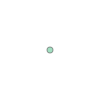

In [5]:
lat = 37.872194
long = 32.490857
start = Point(lat, long)
start

In [26]:
maddi = pd.DataFrame(json.load(open('konya_nufus_yas.json'))["SubRegionals"])[["RegionName", "SESDensity"]]
mahalle = gpd.read_file("15_202103_mahalleler.geojson")

In [27]:
maddi

,RegionName,SESDensity
0,Hüsamettin Çelebi,C Grubu
1,Işıklar,C Grubu
2,Şeyh Şamil,B Grubu
3,Akıncılar,C Grubu
4,Akşemsettin,C Grubu
...,...,...
70,Parsana,B Grubu
71,Akademi,C Grubu
72,Bilecik,C Grubu
73,Sille,C Grubu


In [28]:
text = list()
text2 = list()
text3 = list()
for m, s in zip(maddi["RegionName"], maddi["SESDensity"]):
    text.append(m.upper().replace("Ç", "C").replace("Ö", "O").replace("Ş","S").replace("Ğ","G").replace("Ü", "U").replace("İ", "I"))
    text2.append(s[0])
maddi["ADI_NUMARA"] = text
maddi["SESDensity"] = text2

for a in mahalle["ADI_NUMARA"]:
    text3.append(a.upper().replace("Ç", "C").replace("Ö", "O").replace("Ş","S").replace("Ğ","G").replace("Ü", "U").replace("İ", "I"))


mahalle["ADI_NUMARA"] = text3



In [1]:
for i in mahalle[["ADI_NUMARA", "geometry"]]:
    print(i)

NameError: name 'mahalle' is not defined

In [32]:
df=mahalle.merge(maddi, on="ADI_NUMARA", how="inner").drop("RegionName", axis=1).to_csv("mahalle.csv")

In [33]:
pd.read_csv("mahalle.csv").drop("Unnamed: 0", axis=1).to_csv("mahalle.csv")

In [42]:
pd.read_csv("mahalle.csv").drop("Unnamed: 0", axis=1).drop_duplicates(subset="ADI_NUMARA").to_csv("mahalle.csv")

In [50]:
import shapely.wkt

shapely.wkt.loads(pd.read_csv("mahalle.csv")["geometry"].iloc[4]).contains((33213,123213))

TypeError: BaseGeometry.contains() takes 2 positional arguments but 3 were given

In [5]:
import pandas as pd
x=pd.read_csv("mahalle.csv")["geometry"].iloc[4]

In [13]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [17]:
poly.contains(p1)

True

In [40]:
from requests import get
from json import loads
def routing_time(lat1, long1, lat2, long2, vehicle):
    return get(f"https://graphhopper.com/api/1/route?point={lat1},{long1}&point={lat2},{long2}&profile={vehicle}&locale=tr&calc_points=false&key=e39286d8-4f12-4dee-9fbf-3b61b01a7125")


# def routing_time(lat1, long1, lat2, long2, vehicle):
#     js=str(get(f"https://graphhopper.com/api/1/route?point={lat1},{long1}&point={lat2},{long2}&profile={vehicle}&locale=tr&calc_points=false&key=e39286d8-4f12-4dee-9fbf-3b61b01a7125").content)
#     return loads(js)["paths"][0]["time"]/60000

routing_time(lat, long, 37.89, 32.50, "foot")




<Response [200]>

In [19]:
import json
json.loads(js)["paths"][0]["time"]/60000

lat = 37.882194
long = 32.500857

1800.5794333333333

In [24]:
import pandas as pd

datas=["cinema", "lunapark", "museum", "park"]

for d in datas:
    data = pd.read_json(f"{d}.json")

data

,placeUrl,title,rating,reviewCount,category,attributes,address,plusCode,website,phoneNumber,...,çarşamba,perşembe,cuma,currentStatus,imgUrl,isClaimed,latitude,longitude,query,timestamp
0,https://www.google.com/maps/place/Ecdat+Park%C...,Ecdat Parkı,"4,5",6405,Park,Göl kıyısında Osmanlı mimari tarzında inşa edi...,"Yazır, Saray Bosna Sk. No:4, 42250 Horozluhan ...","XG22+RC Horozluhan Osb, Selçuklu/Konya, Türkiye",,,...,08:00–23:00,08:00–23:00,08:00–23:00,Şu anda açık,https://lh5.googleusercontent.com/p/AF1QipPdsU...,True,37.875,32.475,https://www.google.com/maps/search/konya+parkl...,2022-07-02 09:36:12.604000+00:00
1,https://www.google.com/maps/place/Koza%C4%9Fa%...,Kozağaç Parkı,"4,3",2886,Park,,"Kozağaç, 42090 Meram/Konya, Türkiye",,,+90 332 444 55 42,...,08:00–00:00,08:00–00:00,08:00–00:00,Şu anda açık,https://lh5.googleusercontent.com/p/AF1QipOyya...,True,NaN,NaN,https://www.google.com/maps/search/konya+parkl...,2022-07-02 09:36:15.423000+00:00
2,https://www.google.com/maps/place/Akyoku%C5%9F...,Akyokuş Tabiat Parkı,"4,5",1469,Park,,"Yunus Emre, Yunus Emre Mah. Beyşehir Çevre Yol...","VCJG+48 Horozluhan Osb, Selçuklu/Konya, Türkiye",,+90 332 323 25 10,...,10:00–23:00,10:00–23:00,10:00–23:00,Şu anda açık,https://lh5.googleusercontent.com/p/AF1QipN0xf...,False,37.875,32.475,https://www.google.com/maps/search/konya+parkl...,2022-07-02 09:36:18.892000+00:00
3,https://www.google.com/maps/place/Karaaslan+Ha...,Karaaslan Hadimi Parkı,"4,3",3107,Park,,"Karaaslan Aybahçe, Fidanlık Cd. No:15, 42010 M...","RG58+HM Horozluhan Osb, Selçuklu/Konya, Türkiye",,,...,06:00–01:00,06:00–01:00,06:00–01:00,Şu anda açık,https://lh5.googleusercontent.com/p/AF1QipPnSt...,False,37.875,32.475,https://www.google.com/maps/search/konya+parkl...,2022-07-02 09:36:22.091000+00:00
4,https://www.google.com/maps/place/K%C3%BClt%C3...,Kültür Park,"4,3",14732,Park,"Asfalt yolları, fıskiyeleri, çiçek tarhları, b...","Ferhuniye, Fuar Alanı 4 D, 42060 Selçuklu/Kony...","VFGQ+2M Horozluhan Osb, Selçuklu/Konya, Türkiye",https://kultur-park-alaaddin-eski-fuar.busines...,,...,24 saat açık,24 saat açık,24 saat açık,Şu anda açık,https://lh5.googleusercontent.com/p/AF1QipNG-H...,True,37.875,32.475,https://www.google.com/maps/search/konya+parkl...,2022-07-02 09:36:26.445000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://www.google.com/maps/place/%C3%87ocuk+P...,Çocuk Parkı,"3,6",45,Park,,"Sarıyakup, Burhanettin Tirmizi Sk. No:15, 4202...","VG63+X5 Horozluhan Osb, Selçuklu/Konya, Türkiye",,,...,NaN,NaN,NaN,,https://lh5.googleusercontent.com/p/AF1QipMNoE...,False,37.875,32.475,https://www.google.com/maps/search/konya+parkl...,2022-07-02 09:48:06.316000+00:00
196,https://www.google.com/maps/place/%C3%87ocuk+B...,Çocuk Bahçesi,"4,2",52,Park,,"Yaka, Hardali Sk. No:20, 42090 Meram/Konya, Tü...","VC8G+XH Horozluhan Osb, Selçuklu/Konya, Türkiye",,,...,NaN,NaN,NaN,,https://lh5.googleusercontent.com/p/AF1QipPoQC...,False,37.875,32.475,https://www.google.com/maps/search/konya+parkl...,2022-07-02 09:48:09.538000+00:00
197,https://www.google.com/maps/place/Berlika+Park...,Berlika Parkı,"4,6",7,Eğlence Parkı Etkinliği,,"Gülbahçe, Selbasançayı Sk. No:36, 42140 Meram/...","RCWR+6F Horozluhan Osb, Selçuklu/Konya, Türkiye",,,...,NaN,NaN,NaN,,https://lh5.googleusercontent.com/p/AF1QipO7-D...,False,37.875,32.475,https://www.google.com/maps/search/konya+parkl...,2022-07-02 09:48:12.649000+00:00
198,https://www.google.com/maps/place/Bisiklet+Par...,Bisiklet Parkı,"4,0",4,Su parkı,,"Yazır Mahallesi, Unnamed Road, 42250, Horozluh...","XG64+MM Horozluhan Osb, Selçuklu/Konya, Türkiye",,,...,NaN,NaN,NaN,Geçici olarak kapalı,https://streetviewpixels-pa.googleapis.com/v1/...,False,37.875,32.475,https://www.google.com/maps/search/konya+parkl...,2022-07-02 09:48:15.819000+00:00


In [41]:
pd.read_json("bisiklet_kiralama_konumları.json")

,id,x,y,name,bolge,peron_adet
0,1,32.514845,38.020096,İSTANBUL YOLU KAMPÜS A GİRİŞ,Selçuklu,19
1,2,32.517158,37.979047,İSTANBUL YOLU FARABİ HASTANESİ KAVŞAĞI,Selçuklu,17
2,3,32.501609,37.946063,DOÇ.DR. HALİL ÜRÜN CAD. SELÇUKLU BELEDİYE ÖNÜ,Selçuklu,20
3,4,32.495495,37.904198,İSTANBUL YOLU AYDINLIK EVLER KÖPRÜLÜ KAVŞAGI,Selçuklu,24
4,5,32.478105,37.892597,BEYŞEHİR CAD.SİLLE YOLU KAVŞAĞI,Selçuklu,12
5,6,32.428568,37.874639,BEYŞEHİR ÇEVRE YOLU TIP FAKÜLTESİ YANI,Meram,10
6,7,32.422643,37.853193,YENİ MERAM CAD.ÇAY BAHÇESİ ÖNÜ,Meram,25
7,8,32.445424,37.861731,YENİ MERAM CAD.MERAM EĞİTİM ARAŞTIRMA HASTANES...,Meram,15
8,9,32.458724,37.870822,S.ALİ KEMAL CAD.MELİKŞAH PARKI YANI,Meram,18
9,10,32.499035,37.848702,A.ÖZCAN CAD.ZAFER İ.Ö.O ÖNÜ-KOMEK,Meram,10
